In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Exploratory Data Analysis (EDA):

In [4]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [5]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


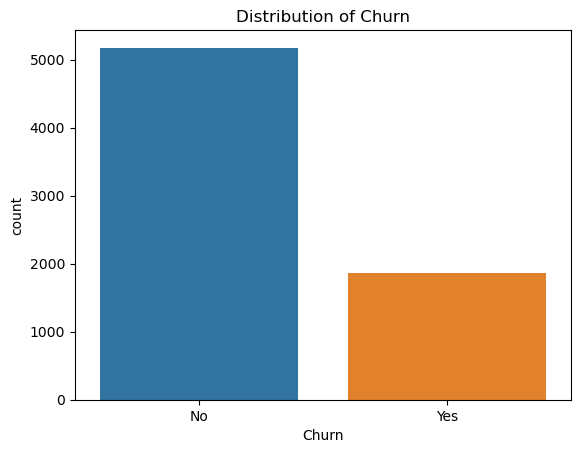

In [10]:
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

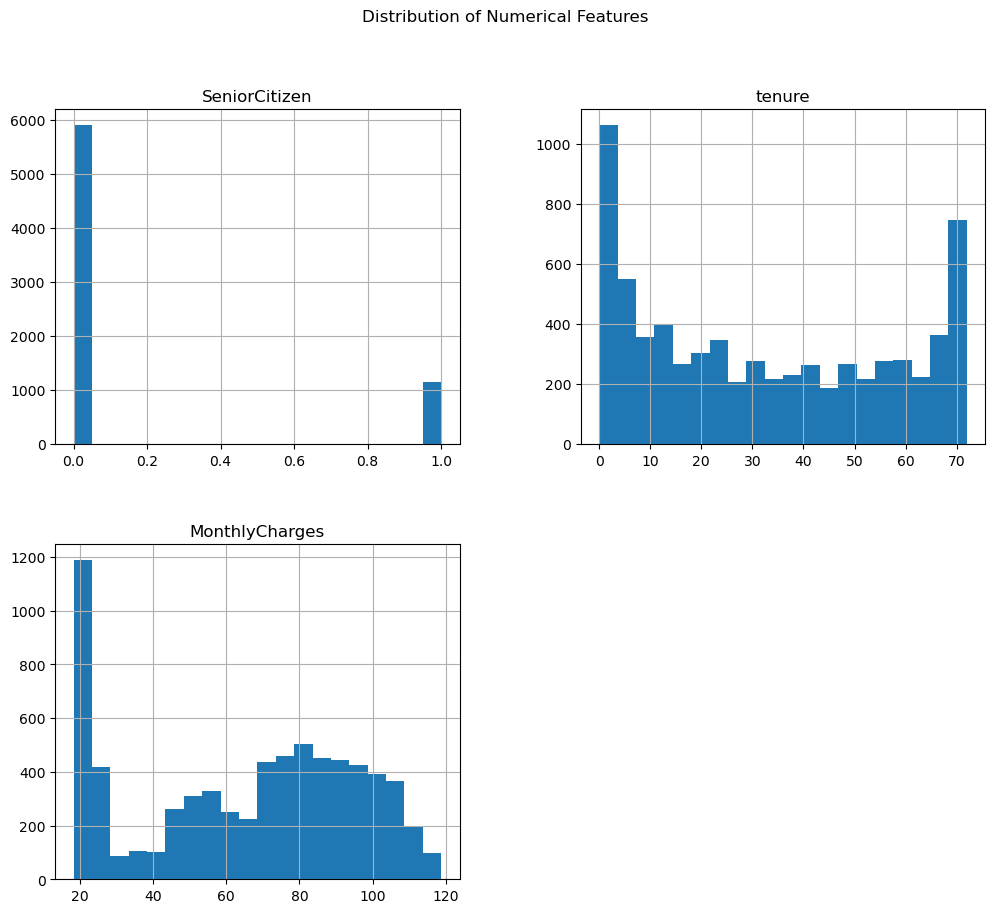

In [11]:
df[numerical_features].hist(figsize=(12, 10), bins=20)
plt.suptitle('Distribution of Numerical Features')
plt.show()

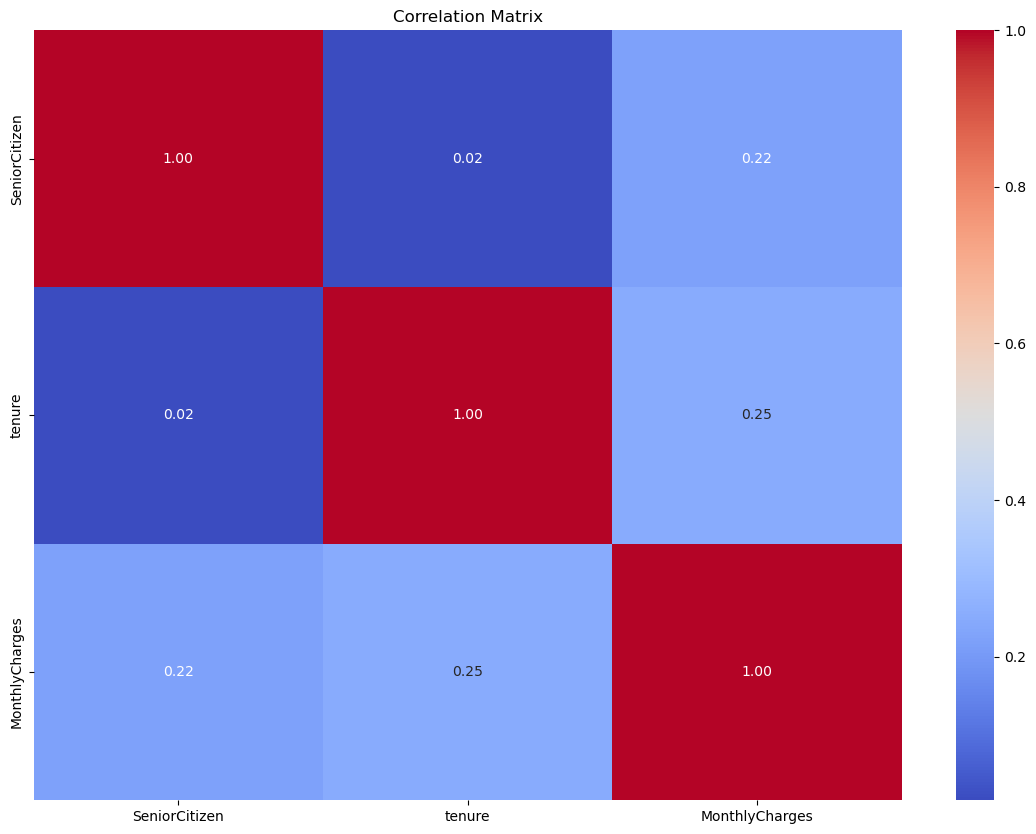

In [12]:
plt.figure(figsize=(14, 10))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

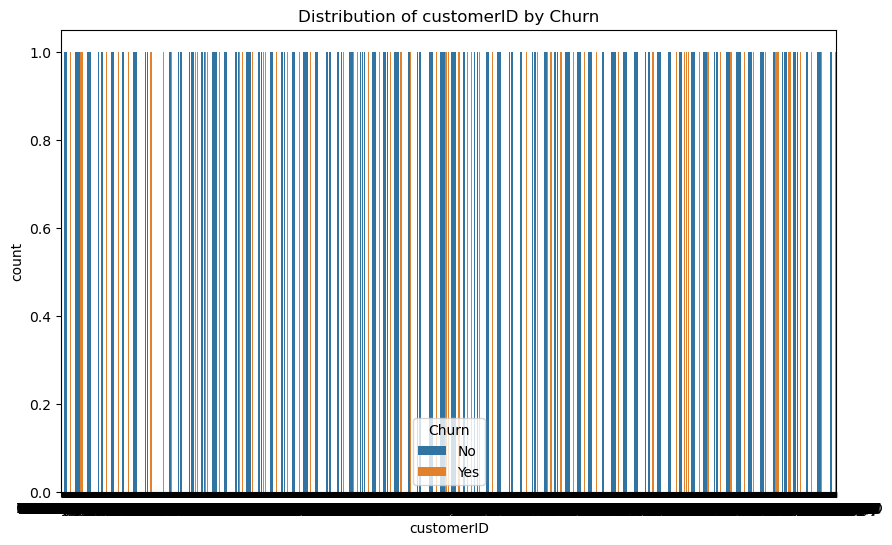

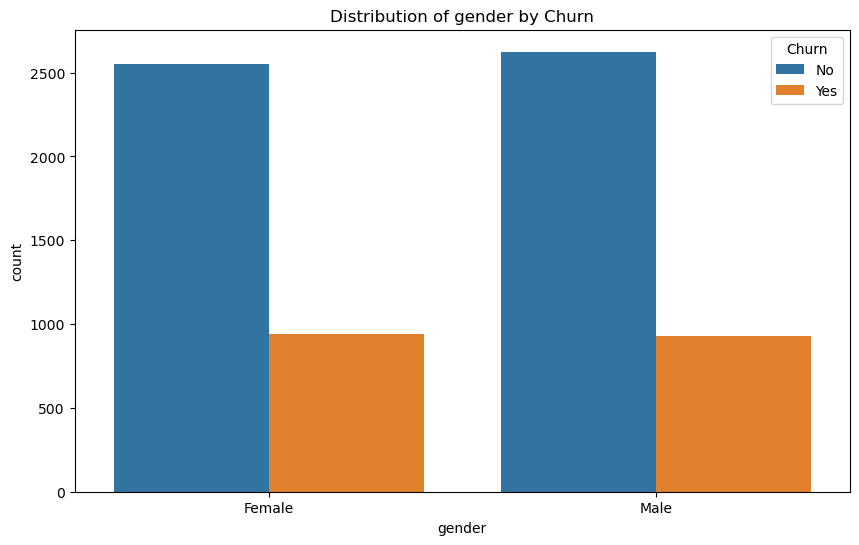

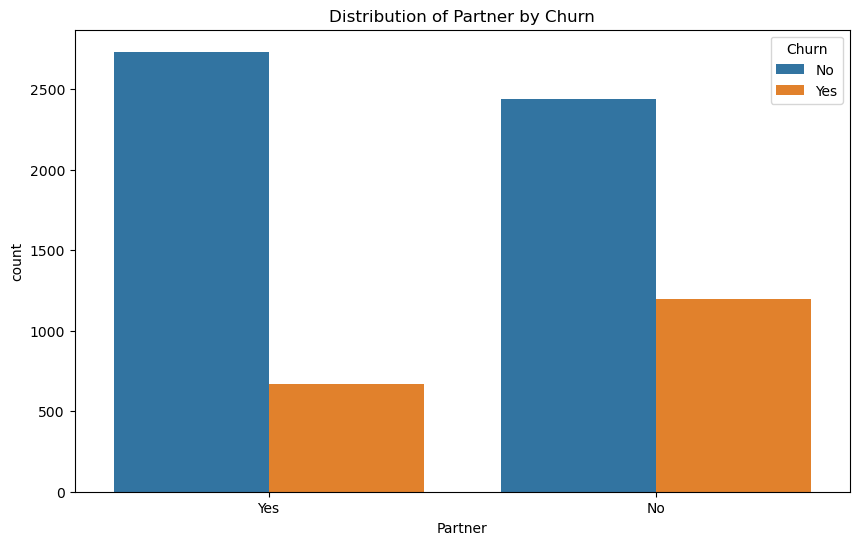

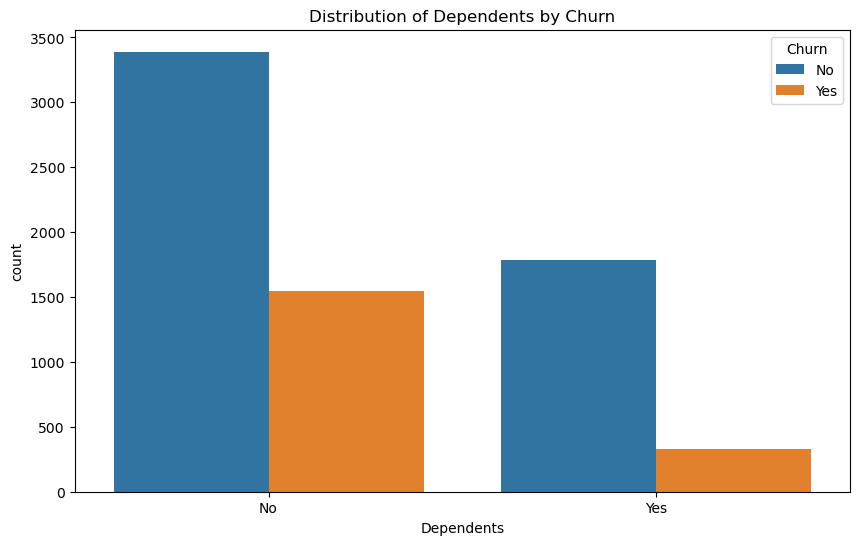

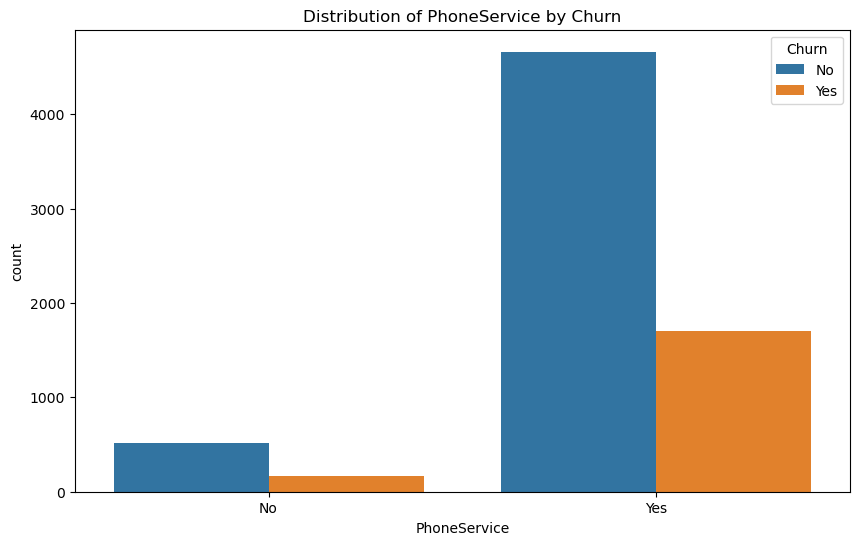

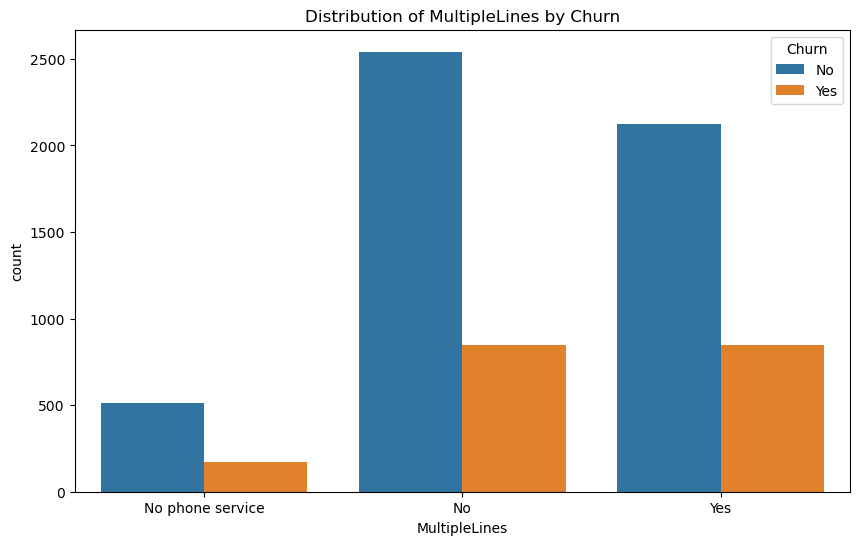

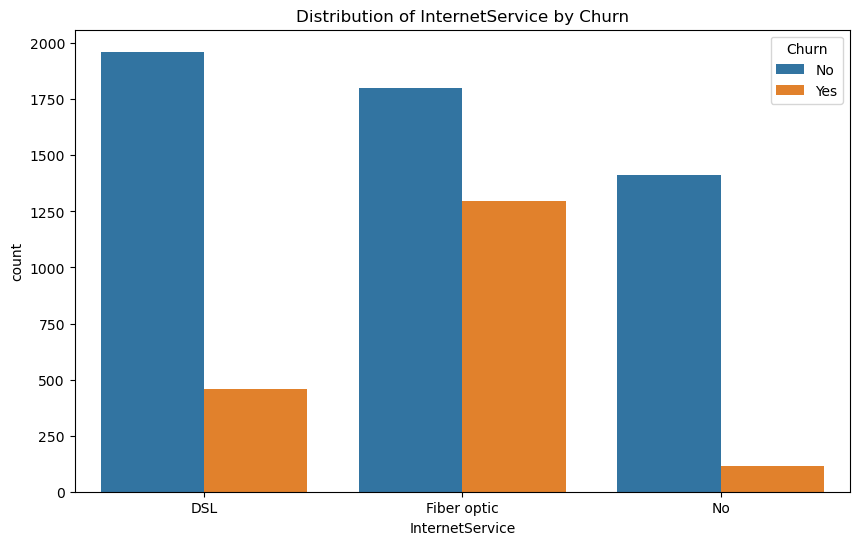

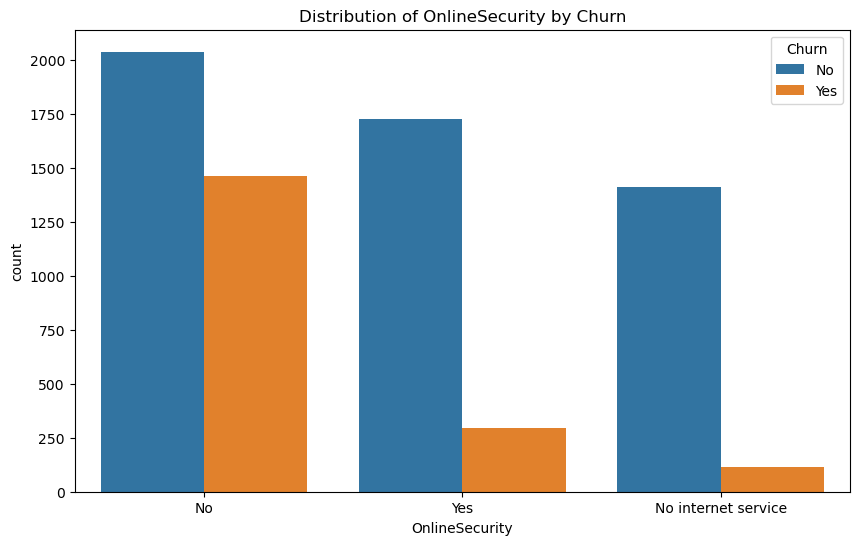

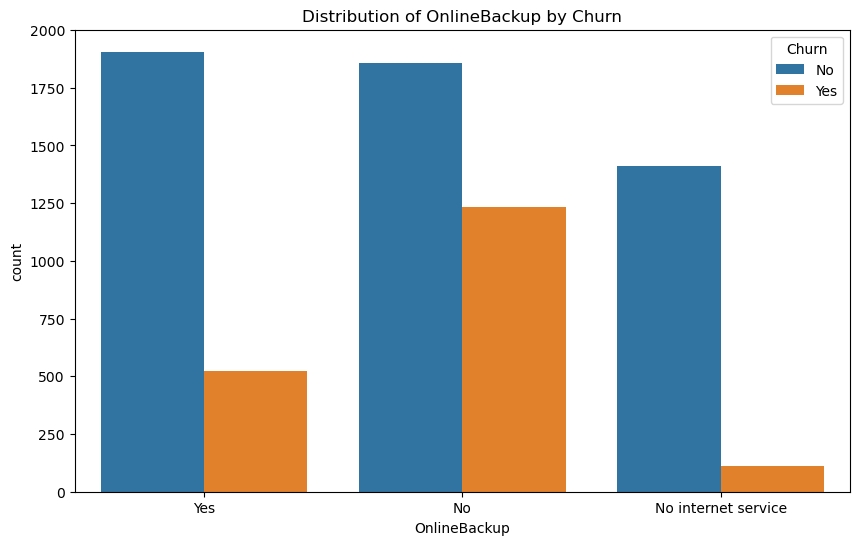

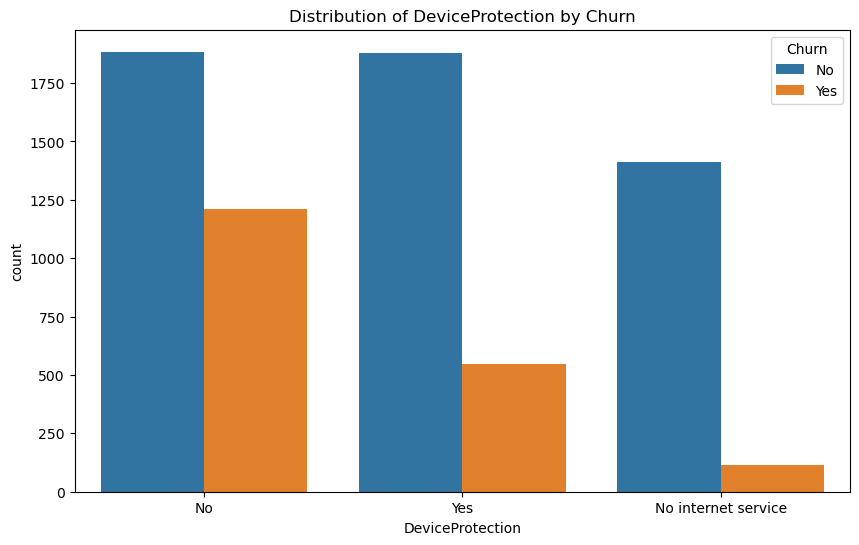

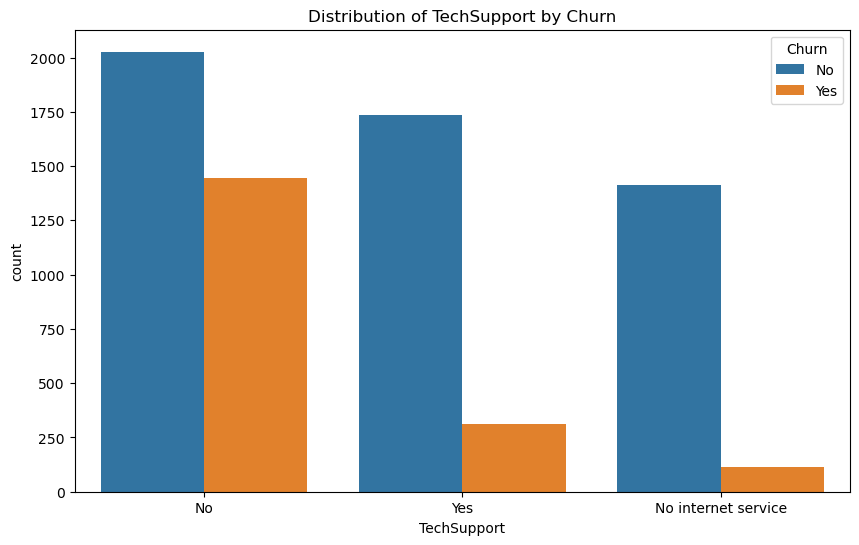

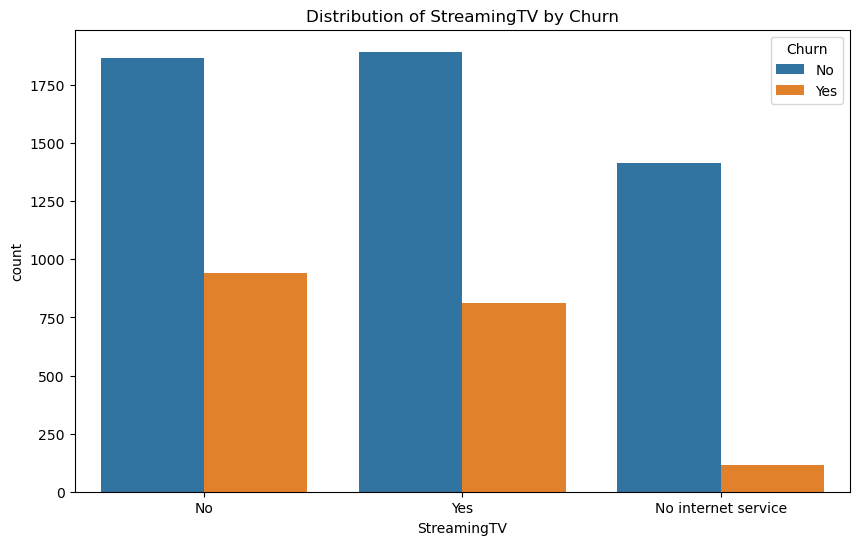

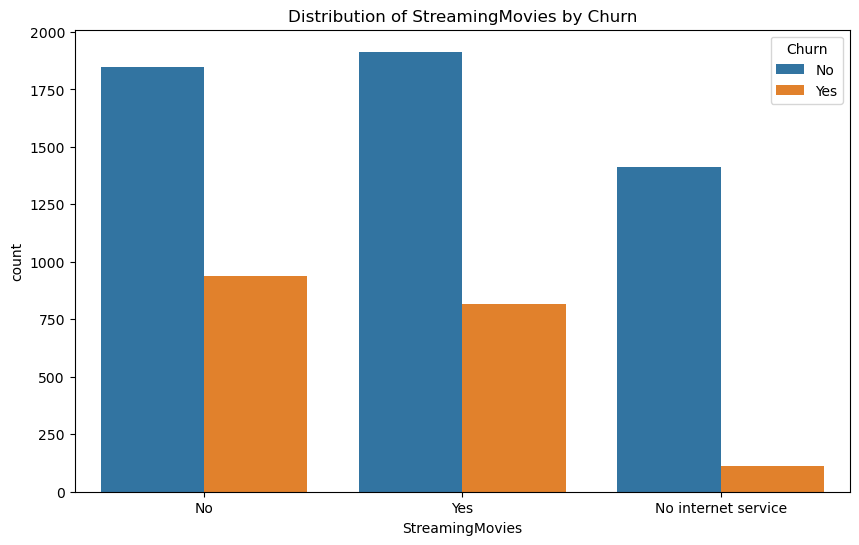

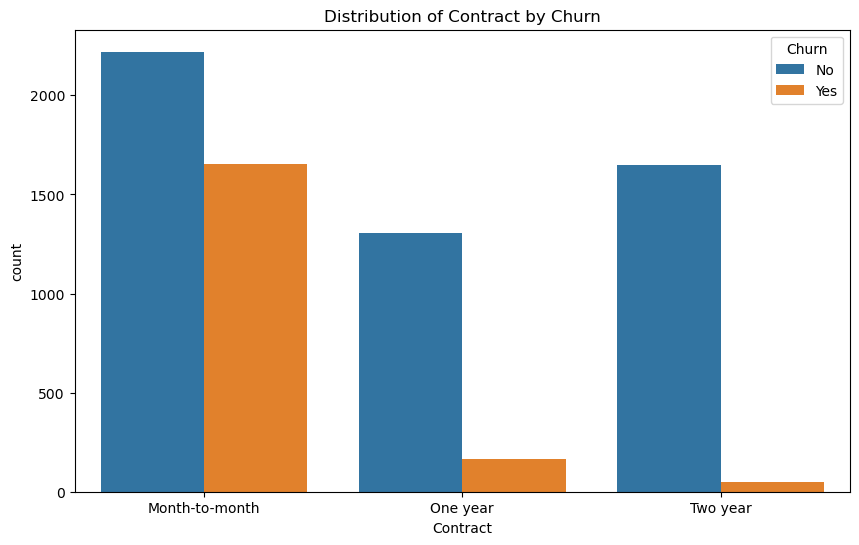

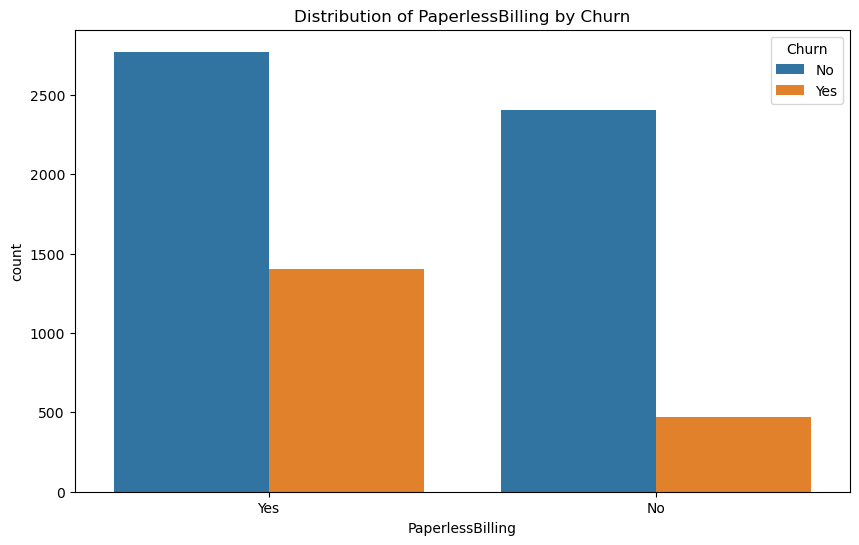

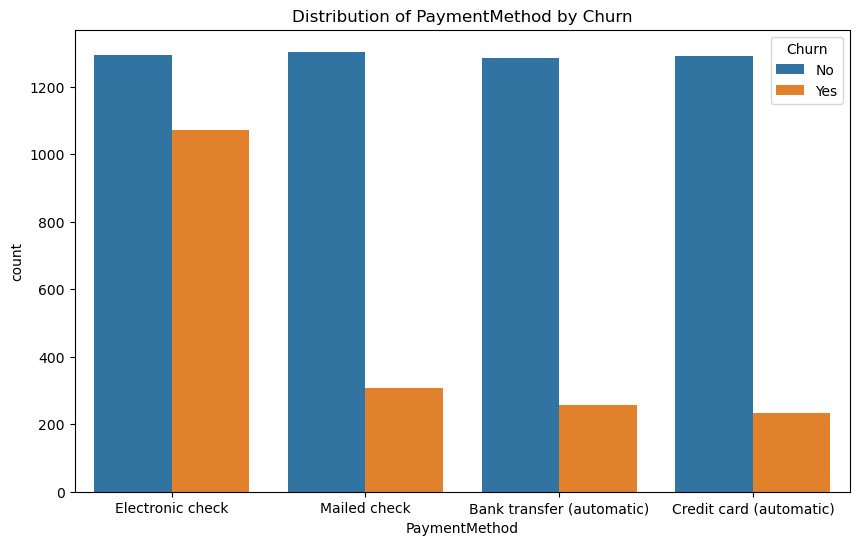

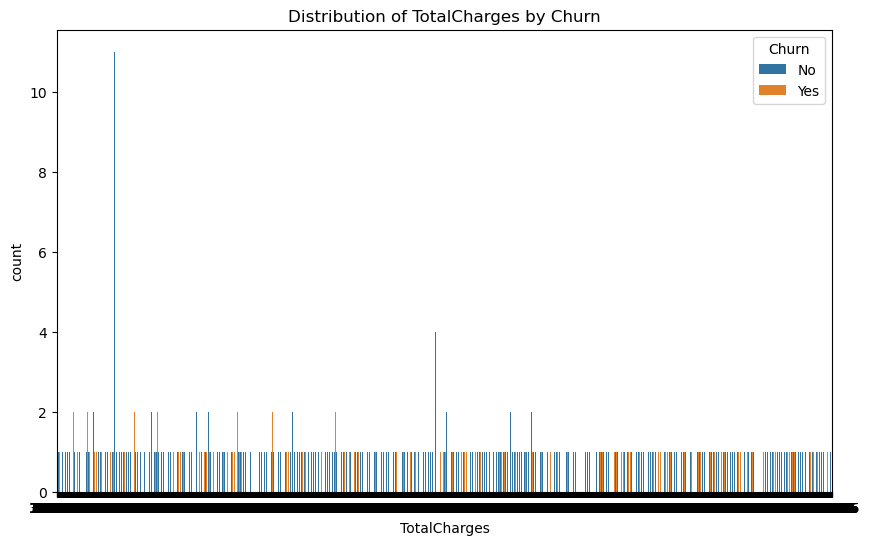

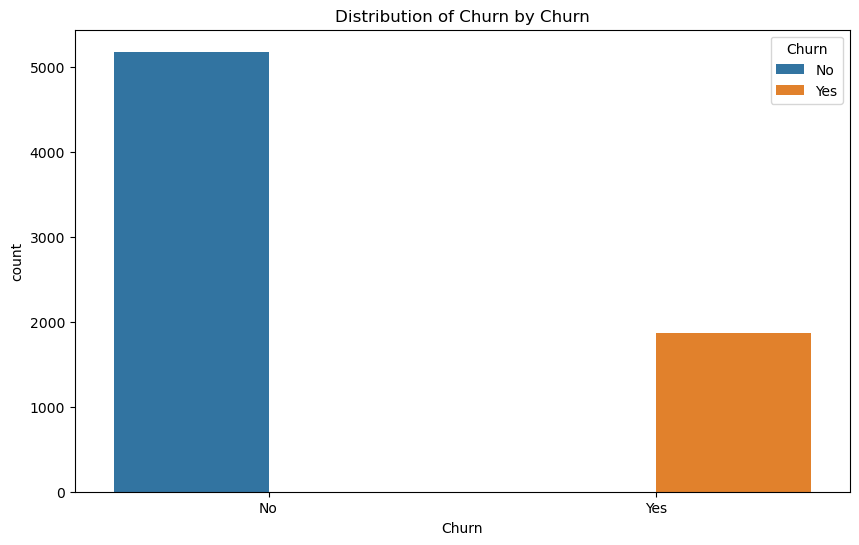

In [13]:
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Distribution of {feature} by Churn')
    plt.show()

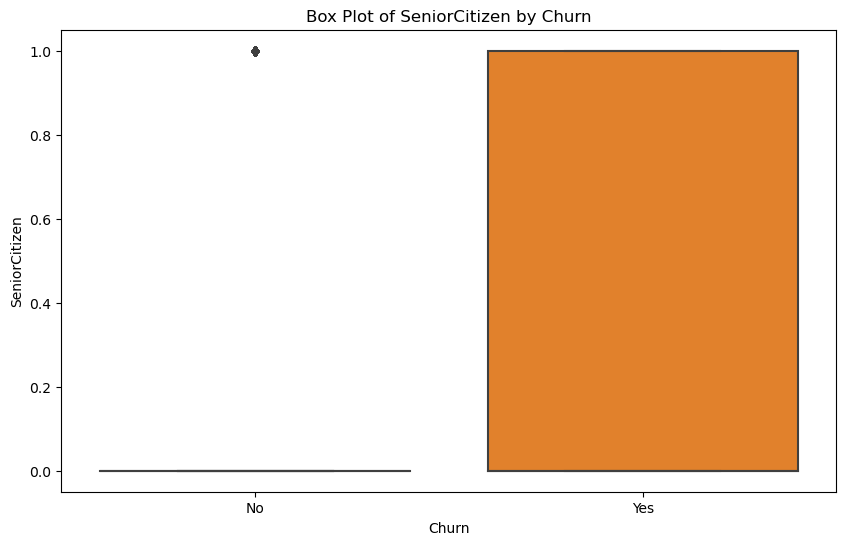

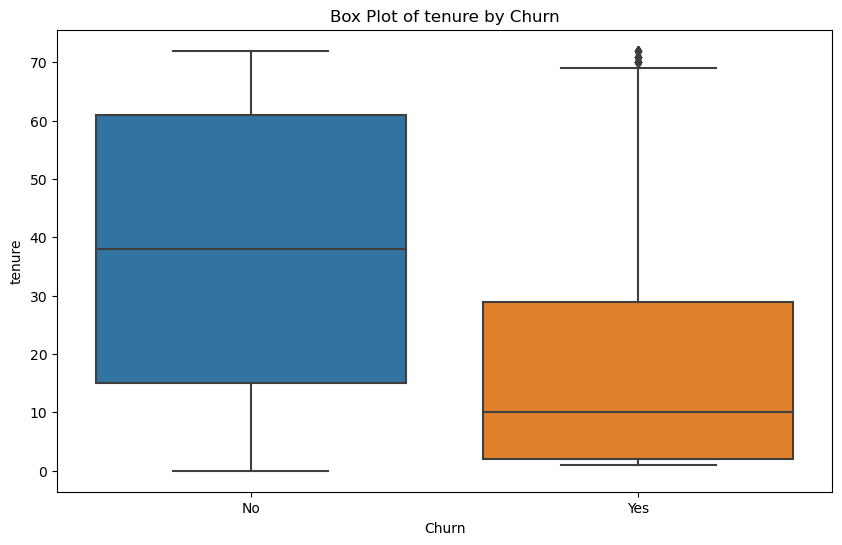

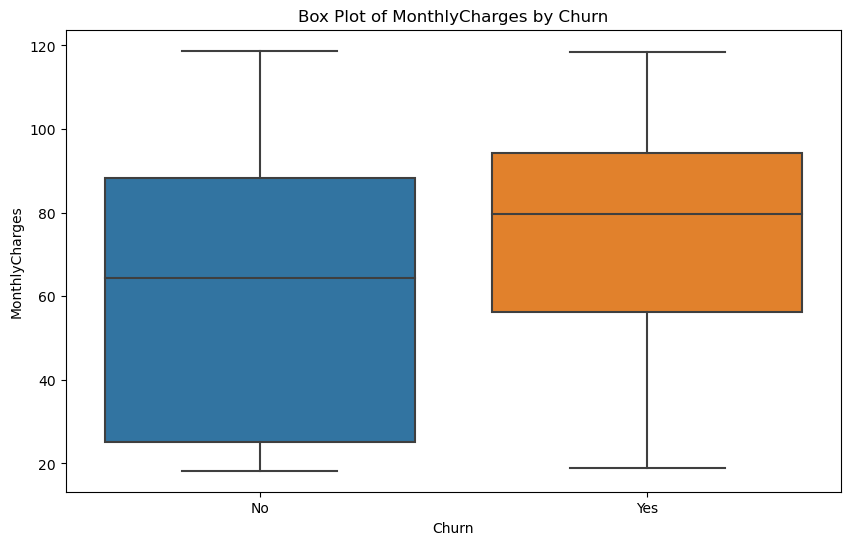

In [14]:
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'Box Plot of {feature} by Churn')
    plt.show()

# Data Preprocessing

In [15]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [16]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

In [17]:
categorical_features = df.select_dtypes(include=['object']).columns

In [22]:
df = pd.get_dummies(df, drop_first=True)

In [25]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']  # Adjust the column name based on your encoded data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classification Task ():

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.82      0.92      0.87      1036
        True       0.67      0.45      0.54       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.70      1409
weighted avg       0.78      0.80      0.78      1409



In [29]:
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'ROC AUC: {roc_auc}')

Confusion Matrix:
[[954  82]
 [205 168]]
ROC AUC: 0.6856257828107695


# Regression Task

In [30]:
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [31]:
y_pred_reg = regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_reg))
r2 = r2_score(y_test, y_pred_reg)

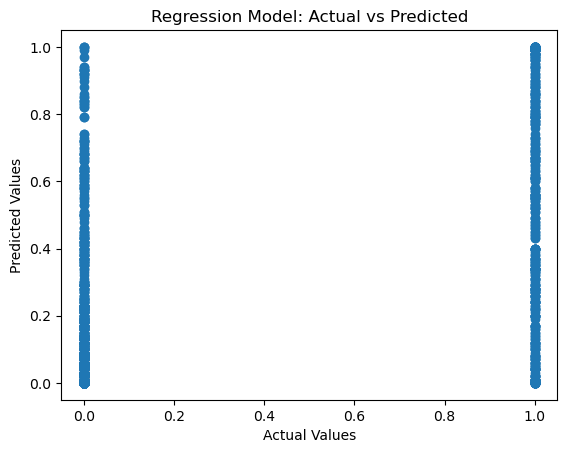

In [32]:
plt.scatter(y_test, y_pred_reg)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Model: Actual vs Predicted')
plt.show()

In [33]:
feature_importances = pd.Series(regressor.feature_importances_, index=X.columns).sort_values(ascending=False)
print(f'Feature Importances:\n{feature_importances}')

Feature Importances:
tenure                            0.147292
InternetService_Fiber optic       0.096863
TotalCharges                      0.091975
MonthlyCharges                    0.081215
PaymentMethod_Electronic check    0.018103
                                    ...   
customerID_4114-QMKVN             0.000000
customerID_4111-BNXIF             0.000000
customerID_4110-PFEUZ             0.000000
customerID_4109-CYRBD             0.000000
customerID_5014-GSOUQ             0.000000
Length: 7072, dtype: float64


# Feature Engineering:

In [35]:
df['TotalChargesPerMonth'] = df['TotalCharges'] / df['tenure']

# Dimensionality Reduction

In [36]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [37]:
classifier_pca = RandomForestClassifier()
classifier_pca.fit(X_train_pca, y_train)

RandomForestClassifier()

In [38]:
y_pred_pca = classifier_pca.predict(X_test_pca)
print("Classification Report with PCA:\n", classification_report(y_test, y_pred_pca))

Classification Report with PCA:
               precision    recall  f1-score   support

       False       0.74      1.00      0.85      1036
        True       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409



C:\Users\mayur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mayur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mayur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)
roc_auc_pca = roc_auc_score(y_test, y_pred_pca)
print(f'Confusion Matrix with PCA:\n{conf_matrix_pca}')
print(f'ROC AUC with PCA: {roc_auc_pca}')

Confusion Matrix with PCA:
[[1036    0]
 [ 373    0]]
ROC AUC with PCA: 0.5


In [41]:
classifier_original = RandomForestClassifier()
classifier_original.fit(X_train, y_train)
y_pred_original = classifier_original.predict(X_test)

In [42]:
print("\nClassification Report without PCA:\n", classification_report(y_test, y_pred_original))


Classification Report without PCA:
               precision    recall  f1-score   support

       False       0.83      0.93      0.87      1036
        True       0.70      0.47      0.56       373

    accuracy                           0.80      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [43]:
conf_matrix_original = confusion_matrix(y_test, y_pred_original)
roc_auc_original = roc_auc_score(y_test, y_pred_original)
print(f'Confusion Matrix without PCA:\n{conf_matrix_original}')
print(f'ROC AUC without PCA: {roc_auc_original}')

Confusion Matrix without PCA:
[[960  76]
 [199 174]]
ROC AUC without PCA: 0.6965644311488814


In [44]:
classifier_pca = RandomForestClassifier()
classifier_pca.fit(X_train_pca, y_train)
y_pred_pca = classifier_pca.predict(X_test_pca)

In [45]:
print("\nClassification Report with PCA:\n", classification_report(y_test, y_pred_pca))


Classification Report with PCA:
               precision    recall  f1-score   support

       False       0.74      1.00      0.85      1036
        True       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409



C:\Users\mayur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mayur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mayur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)
roc_auc_pca = roc_auc_score(y_test, y_pred_pca)
print(f'Confusion Matrix with PCA:\n{conf_matrix_pca}')
print(f'ROC AUC with PCA: {roc_auc_pca}')

Confusion Matrix with PCA:
[[1036    0]
 [ 373    0]]
ROC AUC with PCA: 0.5


In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


compare_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'],
    'Original Model': [accuracy_score(y_test, y_pred_original),
                       precision_score(y_test, y_pred_original),
                       recall_score(y_test, y_pred_original),
                       f1_score(y_test, y_pred_original),
                       roc_auc_original],
    'Model with PCA': [accuracy_score(y_test, y_pred_pca),
                       precision_score(y_test, y_pred_pca),
                       recall_score(y_test, y_pred_pca),
                       f1_score(y_test, y_pred_pca),
                       roc_auc_pca]
})

C:\Users\mayur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
print('\nComparison of Model Performance:')
print(compare_metrics)


Comparison of Model Performance:
      Metric  Original Model  Model with PCA
0   Accuracy        0.804826        0.735273
1  Precision        0.696000        0.000000
2     Recall        0.466488        0.000000
3   F1-Score        0.558587        0.000000
4    ROC AUC        0.696564        0.500000
